1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate, optimize

In [2]:
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
max_speeds.sort()
p = [i/(years_nb+1) for i in range(1, years_nb+1)]

max estimated wind speed in 50 years = 32.97989844019469


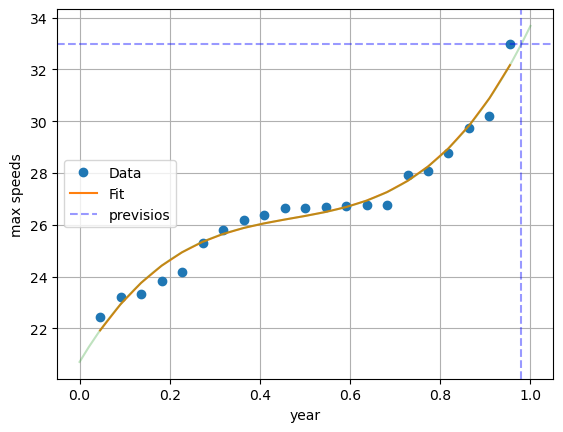

In [3]:
inter = interpolate.UnivariateSpline(p, max_speeds)
# inter.set_smoothing_factor(0.2)
plt.plot(p, max_speeds, 'o', label='Data')
plt.plot(p, inter(p), label='Fit')
x = np.linspace(0, 1, 50)
plt.plot(x, inter(x), alpha=0.3)

fifty_prob = 1 - 0.02
fifty_wind = inter(fifty_prob)
plt.axvline(fifty_prob, color='b', alpha=0.4, ls='--')
plt.axhline(fifty_wind, color='b', alpha=0.4, ls='--', label='previsios')
print('max estimated wind speed in 50 years =', fifty_wind)

plt.ylabel('max speeds')
plt.xlabel('year')
plt.grid()
plt.legend(loc='best')
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Max fit params: [ 6.73581696  2.29443929 23.09209944 15.77929766]
Max fit covariance matrix:
 [[ 6.31509421e-03 -2.12180264e-04 -1.60380944e-03  1.91599242e-03]
 [-2.12180264e-04  2.75415577e-02  1.01462700e-01 -1.70914814e-01]
 [-1.60380944e-03  1.01462700e-01  1.32856304e+00 -1.08326495e+00]
 [ 1.91599242e-03 -1.70914814e-01 -1.08326495e+00  1.38416803e+00]]
Min fit params: [  7.16452586   1.97590015  52.64929216 -61.32093658]
Min fit covariance matrix:
 [[ 2.22850608e-03 -4.92575680e-05 -8.73544713e-04  1.09106635e-03]
 [-4.92575680e-05  5.77333105e-03  2.27194600e-02 -7.06529190e-02]
 [-8.73544713e-04  2.27194600e-02  1.96937013e+00 -1.05131763e+00]
 [ 1.09106635e-03 -7.06529190e-02 -1.05131763e+00  1.41332427e+00]]


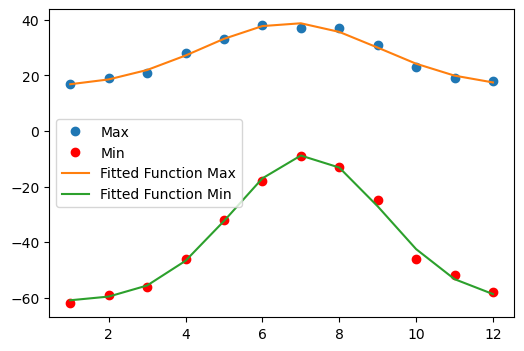

In [4]:
maxes = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
mins = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = np.linspace(1, 12, 12)

plt.figure(figsize=(6, 4))
plt.plot(months, maxes, 'o', ms=6, label='Max')
plt.plot(months, mins, 'ro', label='Min')

def func(x, mean, std, C, offset):
    return C*np.exp(-(((x-mean)/std)**2)/2) + offset

paramsMAX, params_covarianceMAX = optimize.curve_fit(func, months, maxes, p0=[6.7, 1.5, 20, 20])
paramsMIN, params_covarianceMIN = optimize.curve_fit(func, months, mins, p0=[6.5, 1.5, 20, -50])
print("Max fit params:", paramsMAX)
print("Max fit covariance matrix:\n", params_covarianceMAX)
print("Min fit params:", paramsMIN)
print("Min fit covariance matrix:\n", params_covarianceMIN)

plt.plot(months, func(months, paramsMAX[0], paramsMAX[1], paramsMAX[2], paramsMAX[3]), label="Fitted Function Max")
plt.plot(months, func(months, paramsMIN[0], paramsMIN[1], paramsMIN[2], paramsMIN[3]), label="Fitted Function Min")

plt.legend(loc='best');

In [5]:
print("The fit is reasonable: we can see a good gaussian fit.")
print(f"The time offset is not that good for both temperatures: we estimate for maxes: t_mean = ({paramsMAX[0]}+-{(np.diag(params_covarianceMAX)**0.5)[0]})")
print(f"and for mins: t_mean = ({paramsMIN[0]} +- {(np.diag(params_covarianceMIN)**0.5)[0]})")
print(f"They are incompatible: r = {np.abs(paramsMAX[0]-paramsMIN[0])/(np.sqrt((np.diag(params_covarianceMIN)**0.5)[0]**2+(np.diag(params_covarianceMAX)**0.5)[0]**2))}")

The fit is reasonable: we can see a good gaussian fit.
The time offset is not that good for both temperatures: we estimate for maxes: t_mean = (6.735816963668242+-0.07946756700189322)
and for mins: t_mean = (7.1645258584082585 +- 0.047207055402383506)
They are incompatible: r = 4.6381205628284174


3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


In [6]:
from matplotlib.colors import LogNorm

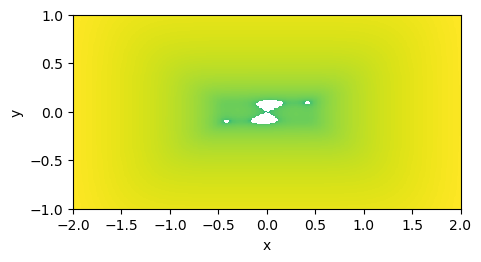

In [7]:
def f(x, y):
    return (4-2.1*x**2+(x**4)/3)*x**2 + x*y + (4*y**2-4)*y**2

# Make data.
x = np.linspace(-8, 8, 100)
y = np.linspace(-8, 8, 100)
xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

plt.figure(figsize=(5,5))
plt.imshow(zz, cmap='viridis', extent=[-2,2,-1,1], norm=LogNorm(vmin=zz.min(), vmax=zz.max()))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
# Find the minimum
def f(x):
    return (4-2.1*x[0]**2+(x[0]**4)/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2

guess = (-0.5, -0.2)
res = optimize.minimize(f, guess, bounds=((-2, 2), (-1, 1)))
print(f"We find with initial guess = {guess} the result is (x, y) = {res.x}: f(x, y) = {f(res.x)}")
guess = (0.5, 0.2)
res = optimize.minimize(f, guess, bounds=((-2, 2), (-1, 1)))
print(f"We find with initial guess = {guess} the result is (x, y) = {res.x}: f(x, y) = {f(res.x)}")
guess = (0.2, 0.2)
res = optimize.minimize(f, guess, bounds=((-2, 2), (-1, 1)))
print(f"We find with initial guess = {guess} the result is (x, y) = {res.x}: f(x, y) = {f(res.x)}")
guess = (-1., -0.2)
res = optimize.minimize(f, guess, bounds=((-2, 2), (-1, 1)))
print(f"We find with initial guess = {guess} the result is (x, y) = {res.x}: f(x, y) = {f(res.x)}")
guess = (0., 0.)
res = optimize.minimize(f, guess, bounds=((-2, 2), (-1, 1)))
print(f"Taking initial guess = {guess} the result is (x, y) = {res.x}: f(x, y) = {f(res.x)}")
print("So 2 minima")

We find with initial guess = (-0.5, -0.2) the result is (x, y) = [ 0.08984195 -0.71265637]: f(x, y) = -1.031628453489855
We find with initial guess = (0.5, 0.2) the result is (x, y) = [-0.08984196  0.71265636]: f(x, y) = -1.031628453489853
We find with initial guess = (0.2, 0.2) the result is (x, y) = [-0.08984196  0.71265646]: f(x, y) = -1.0316284534898337
We find with initial guess = (-1.0, -0.2) the result is (x, y) = [ 0.08984201 -0.7126564 ]: f(x, y) = -1.031628453489877
Taking initial guess = (0.0, 0.0) the result is (x, y) = [0. 0.]: f(x, y) = 0.0
So 2 minima


4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxes-hares population, i.e. determine what is the period of the population of these animals.

In [9]:
from scipy import fftpack

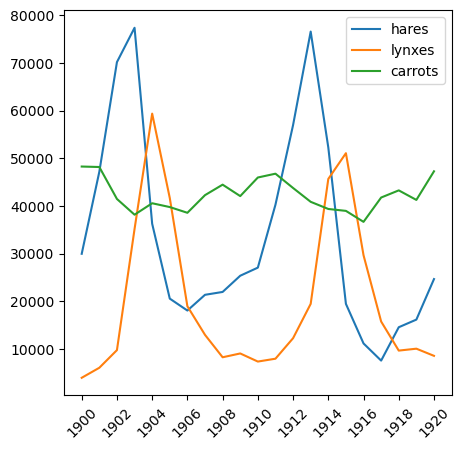

In [10]:
content = np.loadtxt('populations.txt')
years = content[..., 0].astype(int)
species = {
  "hares": content[..., 1],
  "lynxes": content[..., 2],
  "carrots": content[..., 3] }
species_keys = list(species.keys())

# plot the populations
plt.figure(figsize=(5, 5))
plt.plot(years, species['hares'], label='hares')
plt.plot(years, species['lynxes'], label='lynxes')
plt.plot(years, species['carrots'], label='carrots')
plt.xticks(years[::2], rotation=45)
plt.legend(loc="upper right")
plt.show()

In [11]:
# To determine the period, lets compute a 1D FFT of both lynxes and hares
sig_fft_lynx = fftpack.fft(species['lynxes'])
sig_fft_hares = fftpack.fft(species['hares'])

# And the power (sig_fft is of complex dtype)
power_lynx = np.abs(sig_fft_lynx)
power_hares = np.abs(sig_fft_hares)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig_fft_hares.size)

# find peak freq
freqs_hares = sample_freq[sample_freq > 0]
freqs_lynx = sample_freq[sample_freq > 0]
peak_freq_hares = freqs_hares[power_hares[sample_freq > 0].argmax()]
peak_freq_lynx = freqs_lynx[power_lynx[sample_freq > 0].argmax()]

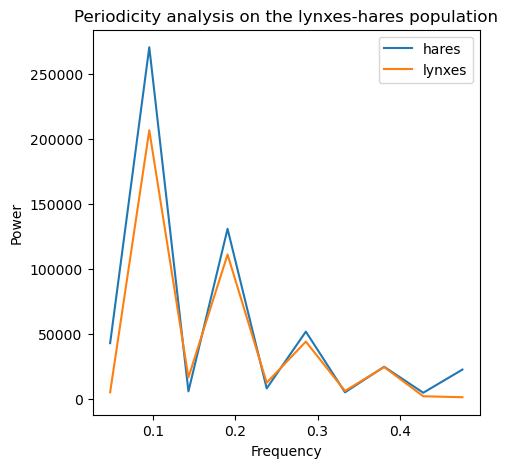

 hares freq: 0.09523809523809523 1/year
 -> hares period: 10.5 years
 lynxes freq: 0.09523809523809523 1/year
 -> lynxes period: 10.5 years


In [12]:
# Plot both 
high_freq_hares = sig_fft_hares.copy()
high_freq_lynx = sig_fft_lynx.copy()
high_freq_hares[np.abs(sample_freq) > 0] = 0
high_freq_lynx[np.abs(sample_freq) > 0] = 0
filter_hares = fftpack.ifft(high_freq_hares)
filter_lynx = fftpack.ifft(high_freq_lynx)

plt.figure(figsize=(5, 5))
plt.plot(freqs_hares, power_hares[sample_freq > 0], label='hares')
plt.plot(freqs_lynx, power_lynx[sample_freq > 0], label='lynxes')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend(loc="upper right")
plt.title("Periodicity analysis on the lynxes-hares population")
plt.show()

print(f' hares freq: {peak_freq_hares} 1/year')
print(f' -> hares period: {1/peak_freq_hares} years')
print(f' lynxes freq: {peak_freq_lynx} 1/year')
print(f' -> lynxes period: {1/peak_freq_lynx} years')

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

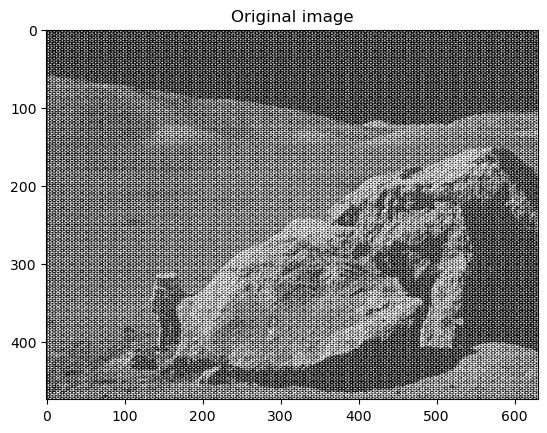

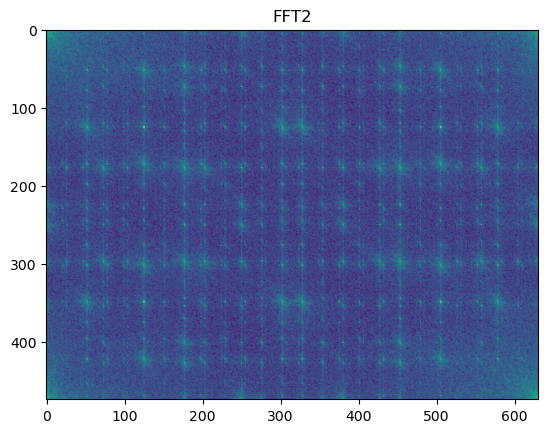

In [13]:
im = plt.imread('moonlanding.png')
# The FFT of the signal
sig_fft2D = fftpack.fft2(im)

plt.imshow(im, plt.cm.gray)
plt.title("Original image")
plt.show()

plt.imshow(np.abs(sig_fft2D), norm=LogNorm(vmin=3))
plt.title("FFT2")
plt.show()

99.91 percentile: 1274.6431364746534


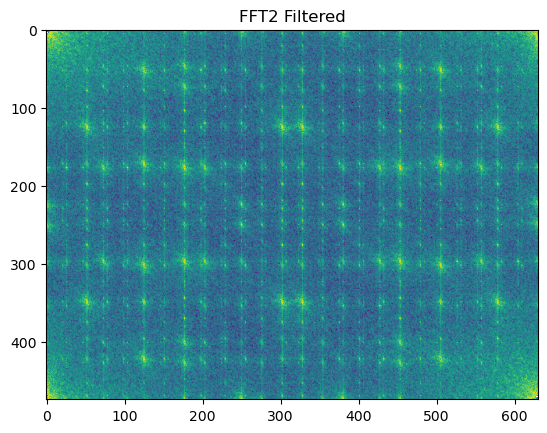

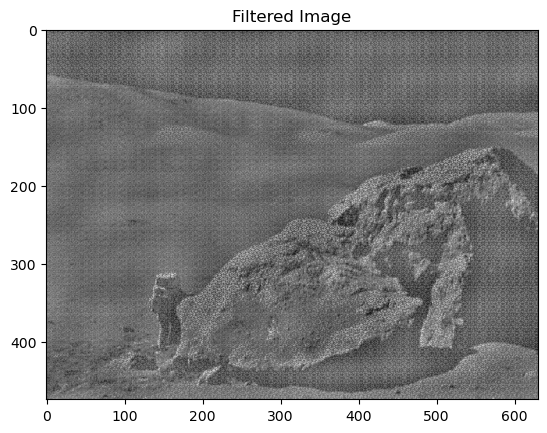

In [14]:
high_freq_fft = sig_fft2D.copy()
power = np.abs(high_freq_fft)
percentile_to_keep = 99.91
print(f'{percentile_to_keep} percentile:', np.percentile(power, percentile_to_keep))
high_freq_fft[ power > np.percentile(power, percentile_to_keep) ] = 0 # suppress all the values above chosen percentile
filtered_sig = fftpack.ifft2(high_freq_fft)

plt.imshow(np.abs(high_freq_fft), norm=LogNorm(vmin=3))
plt.title("FFT2 Filtered")
plt.show()

filtered_image = np.real(filtered_sig)
plt.imshow(filtered_image , plt.cm.gray)
plt.title("Filtered Image");